In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Faux data

A builder class to for fake data.

In [2]:
class Data():
    
    def __init__(self, start=0):
        self.data = [start]

    def add(self, grad, n):
        self.data += (
            self.data[-1] + \
            grad * np.arange(1, n + 1)
        ).tolist()
        return self

    def get(self):
        return self.data

Five products convenient to evaluate for changepoints by just comparing their gradients (since they are made up of straight lines). The series are contrived so that they exhibit points in time which have 0, 1, 2, 3 and 4 simultaneous changepoints.

In [3]:
y1 = Data(50).add(0, 60).get()
y2 = Data(25).add(0, 40).add(10, 10).add(-2.5, 10).get()
y3 = Data(30).add(0, 30).add(10, 10).add(-10, 10). add(10, 10).get()
y4 = Data(120).add(-2.5,40).add(5,10).add(-5,10).get()
y5 = Data(0).add(2.5, 20).add(5, 10).add(-2.5, 20).add(0, 10).get()
D = np.vstack([y1, y2, y3, y4, y5]).T

A colourful plot to delight and dazzle. Axis labels omitted for mystery and intrigue.

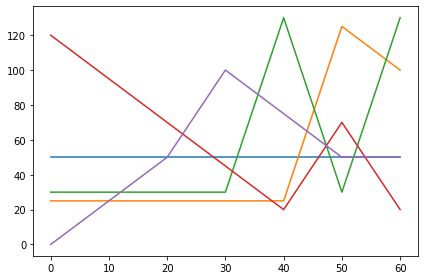

In [4]:
plt.plot(y1)
plt.plot(y2)
plt.plot(y3)
plt.plot(y4)
plt.plot(y5)
plt.tight_layout()

# Changepoint analysis

The skeleton for a change point detector class.

In [5]:
class ChangeDetector:
    
    def __init__(self):
        self.summary = None

    #Since all the series are line segments, the cp_detect
    # function -- provided as a toy example -- just checks
    # to see if the difference between the gradients of the
    # lines have changed in order to determine change points.
    def __cp_detect(self, s1, s2):
        d = np.diff(s1) - np.diff(s2)
        chg = np.argwhere(d[:-1] != d[1:]).flatten()
        if len(chg) > 0: 
            chg = chg + 1
        return np.isin(np.arange(0, len(s1)), chg)
    
    # For each pair pair of products and each time point
    # calculate whether a changepoint occurred. That's
    # a 3D boolean array: product x product x time.
    # Since the relationships are assumed to be symmetrical,
    # we only need to calculate where p > q.
    def fit(self, D):
        n, m = D.shape
        summary = np.zeros((m, m, n))
        for p in np.arange(0, m):
            for q in np.arange(0, m):
                if p > q:
                    d = self.__cp_detect(D[:, p], D[:, q])
                    summary[p, q, :] = d
                    summary[q, p, :] = d
        self.summary = summary
        return self
    
    # Just count up changepoints along either product axis
    # to produce a 2D product x time matrix.
    def predict(self):
        return np.apply_along_axis(np.sum, 0, self.summary)

Now we can output a visual of the (product) x (time) matrix and see for which products all relationships changed and when. Clear to see that 1, 2, 3 and 4 changes have been detected.

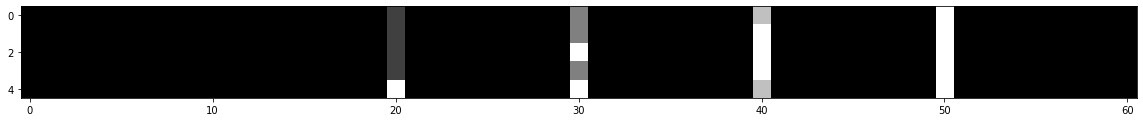

In [6]:
x = ChangeDetector().fit(D).predict()
plt.figure(figsize=(20, 10))
plt.imshow(x, cmap="gray")

In [7]:
x

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 2., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 3., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 4., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 2., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 4., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 4., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 4., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 4., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 4., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 2., 0.,
        0., 0., 0., 0., 0